In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
df.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


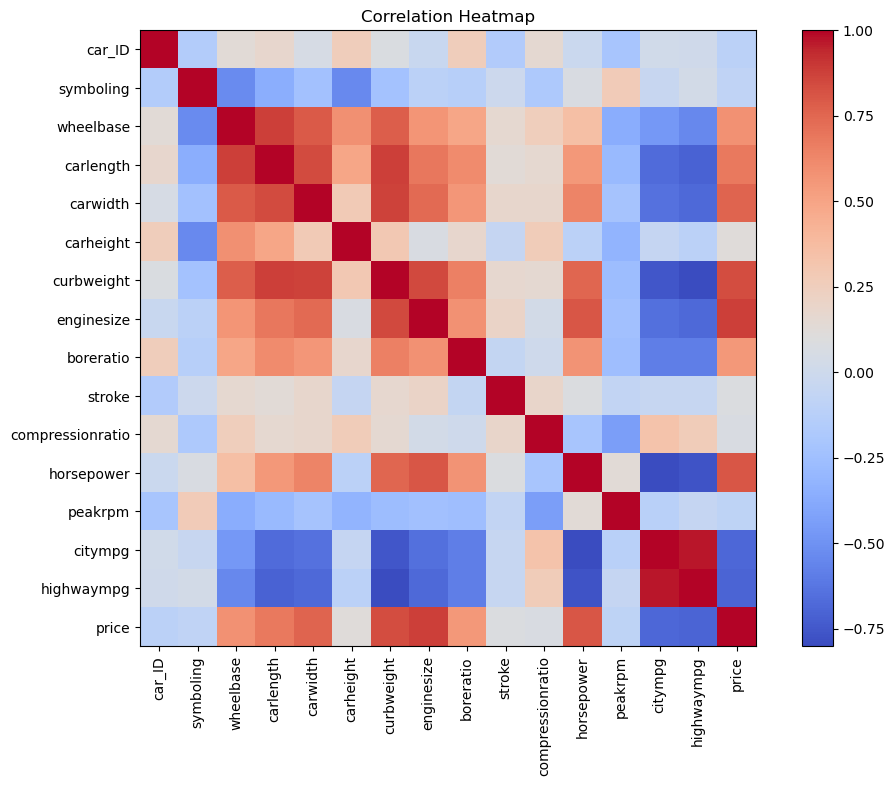

In [12]:
import matplotlib.pyplot as plt

# Correlation heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


In [15]:
df['car_volume'] = df['carlength'] * df['carwidth'] * df['carheight']


In [16]:
df['power_to_weight'] = df['horsepower'] / df['curbweight']


In [18]:
df['avg_mpg'] = (df['citympg'] + df['highwaympg']) / 2
df['price_per_mpg'] = df['price'] / df['avg_mpg']


In [20]:
cylinder_map = {
    'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'eight': 8, 'twelve': 12
}

# Step 1: replace -> keep as object
df['cylindernumber'] = df['cylindernumber'].replace(cylinder_map)

# Step 2: explicitly convert to integer
df['cylindernumber'] = df['cylindernumber'].astype(int)

# Step 3: create new feature
df['engine_per_cylinder'] = df['enginesize'] / df['cylindernumber']


In [21]:
df = df.drop("car_ID", axis=1)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,car_volume,power_to_weight,engine_per_cylinder,avg_mpg,price_per_mpg
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,111,5000,21,27,13495.0,528019.904,0.043564,32.500000,24.0,562.291667
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,111,5000,21,27,16500.0,528019.904,0.043564,32.500000,24.0,687.500000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,154,5000,19,26,16500.0,587592.640,0.054552,25.333333,22.5,733.333333
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,102,5500,24,30,13950.0,634816.956,0.043646,27.250000,27.0,516.666667
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,115,5500,18,22,17450.0,636734.832,0.040722,27.200000,20.0,872.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,114,5400,23,28,16845.0,721961.760,0.038618,35.250000,25.5,660.588235
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,160,5300,19,25,19045.0,720913.920,0.052476,35.250000,22.0,865.681818
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,134,5500,18,23,21485.0,721961.760,0.044489,28.833333,20.5,1048.048780
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,106,4800,26,27,22470.0,721961.760,0.032950,24.166667,26.5,847.924528


In [22]:
df["CarBrand"] = df["CarName"].apply(lambda x: x.split(" ")[0].lower())
df = df.drop("CarName", axis=1)

In [23]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,peakrpm,citympg,highwaympg,price,car_volume,power_to_weight,engine_per_cylinder,avg_mpg,price_per_mpg,CarBrand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,5000,21,27,13495.0,528019.904,0.043564,32.500000,24.0,562.291667,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,5000,21,27,16500.0,528019.904,0.043564,32.500000,24.0,687.500000,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,5000,19,26,16500.0,587592.640,0.054552,25.333333,22.5,733.333333,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,5500,24,30,13950.0,634816.956,0.043646,27.250000,27.0,516.666667,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,5500,18,22,17450.0,636734.832,0.040722,27.200000,20.0,872.500000,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,5400,23,28,16845.0,721961.760,0.038618,35.250000,25.5,660.588235,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,5300,19,25,19045.0,720913.920,0.052476,35.250000,22.0,865.681818,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,5500,18,23,21485.0,721961.760,0.044489,28.833333,20.5,1048.048780,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,4800,26,27,22470.0,721961.760,0.032950,24.166667,26.5,847.924528,volvo


In [24]:
df["CarBrand"] = df["CarBrand"].replace({
    "vw": "volkswagen",
    "vokswagen": "volkswagen",
    "toyouta": "toyota",
    "maxda": "mazda",
    "porcshce": "porsche"
})


In [27]:
df_le = df.copy()

cat_cols = df_le.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df_le[col] = le.fit_transform(df_le[col])

df_le.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,peakrpm,citympg,highwaympg,price,car_volume,power_to_weight,engine_per_cylinder,avg_mpg,price_per_mpg,CarBrand
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5000,21,27,13495.0,528019.904,0.043564,32.500000,24.0,562.291667,0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5000,21,27,16500.0,528019.904,0.043564,32.500000,24.0,687.500000,0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5000,19,26,16500.0,587592.640,0.054552,25.333333,22.5,733.333333,0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5500,24,30,13950.0,634816.956,0.043646,27.250000,27.0,516.666667,1
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,5500,18,22,17450.0,636734.832,0.040722,27.200000,20.0,872.500000,1


In [28]:
X = df_le.drop("price", axis=1)   
y = df_le["price"]  

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

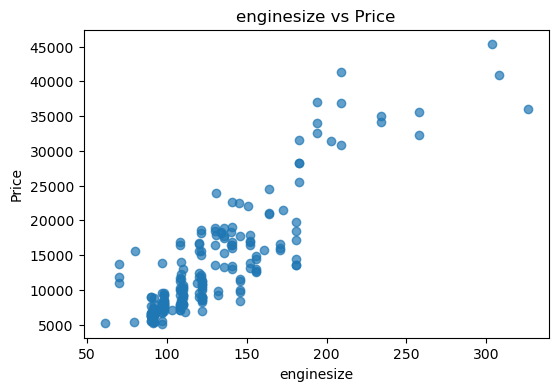

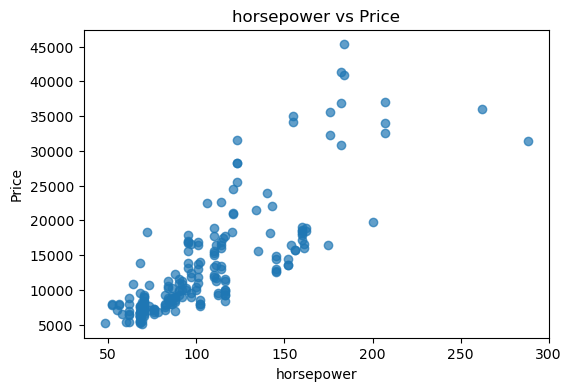

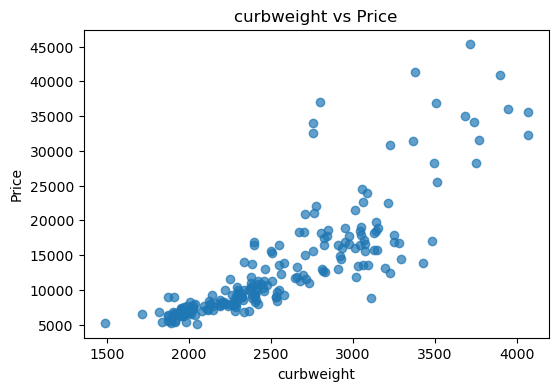

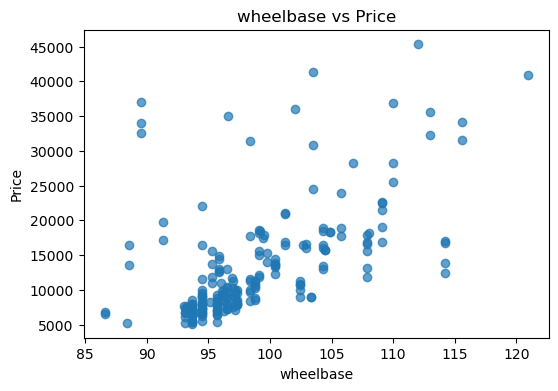

In [30]:
key_features = ["enginesize", "horsepower", "curbweight", "wheelbase"]

for col in key_features:
    plt.figure(figsize=(6,4))
    plt.scatter(df_le[col], df_le["price"], alpha=0.7)
    plt.title(f"{col} vs Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

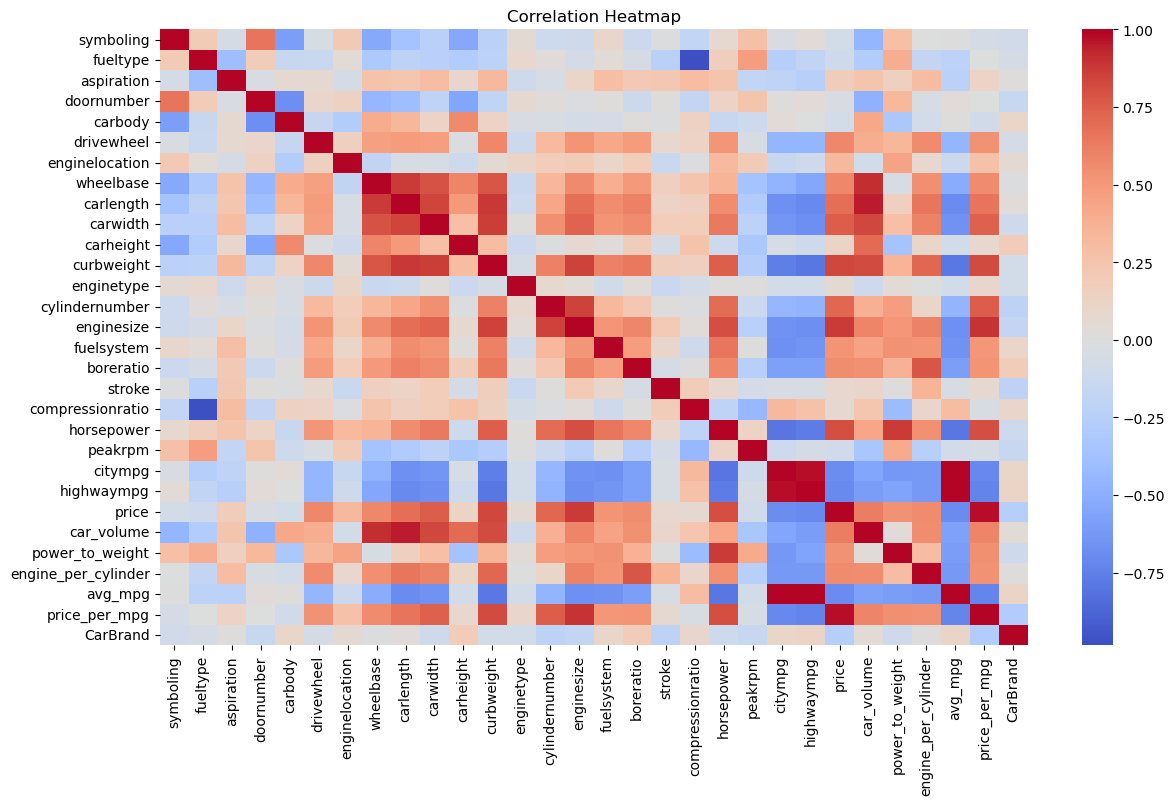

In [34]:

plt.figure(figsize=(14,8))
corr = df_le.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()



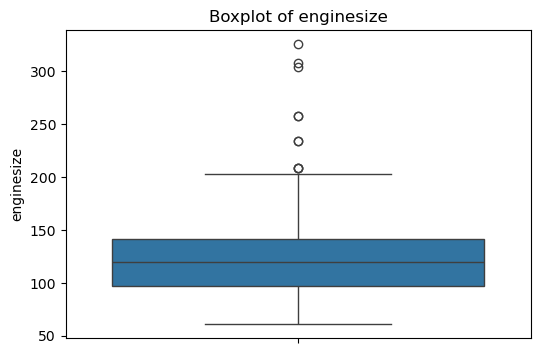

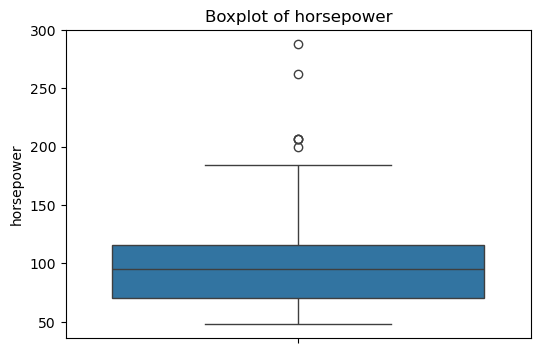

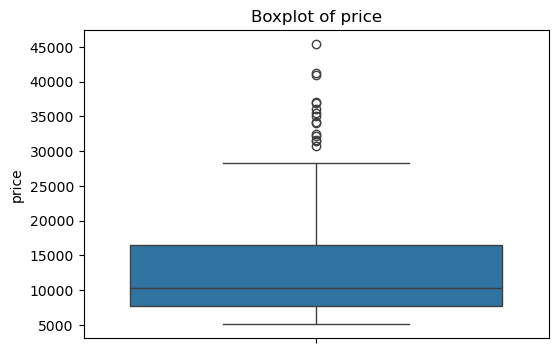

In [36]:
for col in ["enginesize", "horsepower", "price"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df_le[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [37]:
def handle_outliers(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_clean[col] = np.clip(df_clean[col], lower_bound, upper_bound)

        print(f"{col}: outliers capped to range [{lower_bound:.2f}, {upper_bound:.2f}]")
    return df_clean

df_le = handle_outliers(df_le, ["enginesize", "horsepower"])

enginesize: outliers capped to range [31.00, 207.00]
horsepower: outliers capped to range [1.00, 185.00]


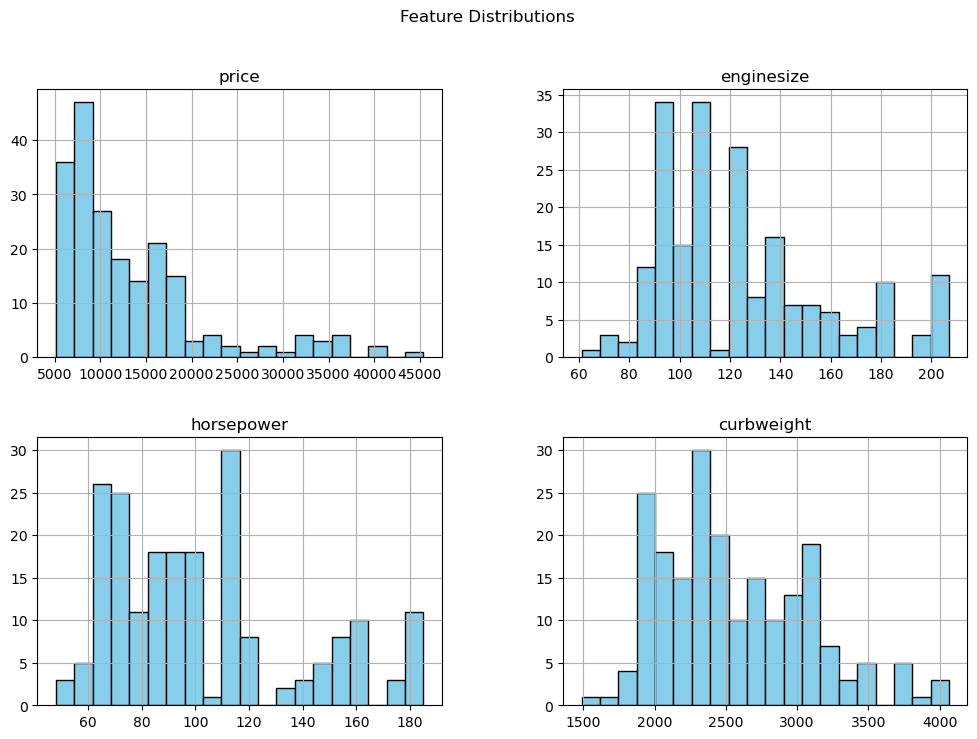

In [38]:
df_le[["price","enginesize","horsepower","curbweight"]].hist(
    bins=20, figsize=(12,8), color="skyblue", edgecolor="black"
)
plt.suptitle("Feature Distributions")
plt.show()


In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

In [40]:
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [41]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [42]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:")
    print(f"  RMSE = {rmse:.2f}")
    print(f"  R²   = {r2:.3f}")
    print("-"*30)

evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

Linear Regression:
  RMSE = 1155.73
  R²   = 0.983
------------------------------
Ridge Regression:
  RMSE = 1290.47
  R²   = 0.979
------------------------------
Random Forest Regression:
  RMSE = 1173.83
  R²   = 0.983
------------------------------
